In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests



In [2]:
# Task 1, 2

url = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')   # getting data from webpage


In [3]:
url.status_code                                                                         # making sure transmission was ok

200

In [4]:
url.content

b'\n<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by GDP (nominal) - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XptJygpAMNYAA2GDZHUAAACN","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":951705869,"wgRevisionId":951705869,"wgArticleId":380845,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using Timeline","Articles with short description","Wikipedia indefinitely semi-protected pages","Use dmy

In [5]:
soup = BeautifulSoup(url.content, 'html.parser')
print(soup.prettify())                                                # using bs4 to parse data, prettify to organize it.

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries by GDP (nominal) - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XptJygpAMNYAA2GDZHUAAACN","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":951705869,"wgRevisionId":951705869,"wgArticleId":380845,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using Timeline","Articles with short description","Wikipedia indefinitely semi-protected pages"

In [6]:
# Task 3

all_tables = soup.find_all("table")                                   # locating all tables in data. total equals 10

In [7]:
print("Total number of tables are {} ".format(len(all_tables)))

Total number of tables are 10 


In [8]:
# Task 4

My_table = soup.find('table',{'class':'wikitable'})                 # locating my specific tables of choice
print(type(My_table))

<class 'bs4.element.Tag'>


In [9]:
# Task 5  

source = My_table.tbody.findAll('tr', recursive=False)[0]           #  checking to see how many tables are in the body.
sources_list = [td for td in source.findAll('td')]
print(len(sources_list))

3


In [10]:
data = My_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [11]:
data_tables = []                                                    # actually separating data from source
for td in data:
    data_tables.append(td.findAll('table'))

In [12]:
len(data_tables)

3

In [13]:
# Task 6- getting the source names

source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [14]:

header_1 = [th.getText().strip() for th in data_tables[0][0].findAll('th')]           # separating the header from the 1st source

In [15]:
header_1

['Rank', 'Country/Territory', 'GDP(US$million)']

In [16]:
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]            

In [17]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]    # separating data from the 1st source

In [18]:
df1 = pd.DataFrame(data_rows1, columns= header_1)             # combining data and header to create dataframe

In [19]:
df1

,Rank,Country/Territory,GDP(US$million)
0,,World[19],"87,265,226"
1,1,United States,"21,439,453"
2,—,European Union[23][n 1],"18,705,132"
3,2,China[n 2],"14,140,163"
4,3,Japan,"5,154,475"
...,...,...,...
189,182,Palau,291
190,183,Marshall Islands,220
191,184,Kiribati,184
192,185,Nauru,108


In [20]:
# Task 7 - doing the same thing as the 1st source for source 2 and 3

header_2 = [th.getText().strip() for th in data_tables[1][0].findAll('th')]
header_2

['Rank', 'Country/Territory', 'GDP(US$million)']

In [21]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]

In [22]:
data_rows2 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows2]

In [23]:
data_frame_2 = pd.DataFrame(data_rows2, columns=header_2)

In [24]:
data_frame_2

,Rank,Country/Territory,GDP(US$million)
0,,World,"85,804,391"
1,1,United States,"20,494,100"
2,2,China[n 5],"13,608,152"
3,3,Japan,"4,970,916"
4,4,Germany,"3,996,759"
...,...,...,...
187,181,Palau,310
188,182,Marshall Islands,212
189,183,Kiribati,188
190,184,Nauru,115


In [25]:
header_3 = [th.getText().strip() for th in data_tables[2][0].findAll('th')]   # now the third table

In [26]:
header_3

['Rank', 'Country/Territory', 'GDP(US$million)']

In [27]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]

In [28]:
data_rows3 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows3]

In [29]:
data_frame_3 = pd.DataFrame(data_rows3, columns=header_3)

In [30]:
data_frame_3

,Rank,Country/Territory,GDP(US$million)
0,,World[25],"80,501,413"
1,1,United States,"19,485,394"
2,2,China[n 5],"12,234,781"
3,3,Japan,"4,872,415"
4,4,Germany,"3,693,204"
...,...,...,...
208,189,Marshall Islands,209
209,190,Nauru,182
210,191,Kiribati,180
211,—,Montserrat,63


In [31]:
# Activity 8

import pandas as pd                    # loading libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
data1 = pd.read_csv("visit_data.csv")          # loading csv file

In [33]:
data1.head()                               # reading first 5 rows to ensure data was loaded correctly, i can see NaN in data.

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [34]:
# checking for duplicates

print("First name duplicates - {}".format(any(data1.first_name.duplicated())))  # we can see there are duplicates for names
print("Last name duplicates - {}".format(any(data1.last_name.duplicated())))    # which can still be actual different people.
print("Email duplicates - {}".format(any(data1.email.duplicated())))            # and no duplicate emails helps this assumption.

First name duplicates - True
Last name duplicates - True
Email duplicates - False


In [35]:
print(data1.isnull().sum())             # we can see there are several NaN in this data

id              0
first_name    296
last_name     296
email           0
gender        505
ip_address      0
visit          26
dtype: int64


In [36]:
# task 4 - getting rid of outliers

size_pre = data1.shape                
data2 = data1[np.isfinite(data1['visit'])] #using isfinite in place operation to remove outliers.
size_post = data2.shape          # data frame post removing outliers

In [37]:
# Task 5- reporting difference of data size pre and post outlier removal

print("The size of previous data was - {pre[0]} rows and the size of the new one is - {post[0]} rows".
      format(pre=size_pre, post=size_post))

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x2908f1ad4c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2908f1ade08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2908f1a7908>],
 'medians': [<matplotlib.lines.Line2D at 0x2908f1b7f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2908f1bbf08>],
 'means': []}

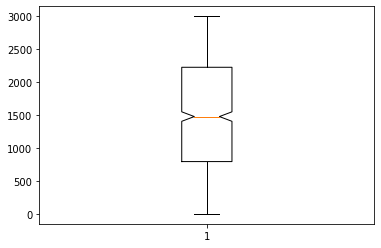

In [38]:
# Task 6- creating a box plot on data

plt.boxplot(data2.visit, notch=True)

In [39]:
data2 = data1[(data1['visit'] <= 2900) & (data1['visit'] >= 100)]  # we see we range around 700-2250/2300 so we will set our
                                                        #  lower limit to 100 and upper limit 2900 anything above the upper
                                                        # and below the lower limit will be considered an outlier and removed.

In [40]:
print("Post outlier removal, new data size is - {}".format(*data2.shape))

Post outlier removal, new data size is - 923


In [41]:
# Assignment part 3- SQL lite database

import sqlite3                                # import libraries

In [42]:
con = sqlite3.connect('example.db')          # Connecting to sqlite

In [43]:
cursor = con.cursor()                  # creating cursor object

In [44]:
cursor.execute("DROP TABLE IF EXISTS INFORMATION")      # dropping any table if named INFORMATION, to ensure no tables have same
                                                        # name as table name I am creating.

In [45]:
sql = '''CREATE TABLE INFORMATION(NAME CHAR(20) NOT NULL, ADDRESS CHAR, CITY CHAR, STATE CHAR, 
         ZIP int, PHONE int)'''

In [46]:
cursor.execute(sql)
print('table created successfully')

table created successfully


In [47]:
con.commit()

In [48]:
con.close()

In [49]:
# Part B

In [50]:
con = sqlite3.connect('example.db')

In [51]:
cursor = con.cursor()

In [52]:
 # Inserting records into the data base table
    
cursor.execute('''INSERT INTO INFORMATION(                               
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('MATTHEW', '123 PARK', 'LOS ANGELES', 'CA', 92804, 2132222121)''')

In [53]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('MARK', '456 forest', 'ANAHEIM', 'CA', 92804, 7142123333)''')

In [54]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('LUKE', '789 Trail', 'LOS ANGELES', 'CA', 91313, 3231112222)''')

In [55]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('JOHN', '123 Easter ave', 'DALLAS', 'TX', 72313, 3124442222)''')

In [56]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('PETER', '212 HOPE DR', 'PASADENA', 'CA', 91322, 3105547676)''')

In [57]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('PAUL', '245 GRACE AVE', 'OAKLAND', 'CA', 91286, 4558784545)''')

In [58]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('THOMAS', '577 WOODRIDGE AVE', 'SEATTLE', 'WA', 31244, 9882337878)''')

In [59]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('JAMES', '655 NEWBERRY DR', 'ALEXANDRIA', 'VA', 23256, 2124668787)''')

In [60]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('ELI', '788 CRESTLAKE', 'COLUMBUS', 'OH', 34767, 7663443222)''')

In [61]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('JACOB', '877 LAKE', 'SAN DIEGO', 'CA', 91233, 3439897877)''')

In [62]:
cursor.execute('''INSERT INTO INFORMATION(
   NAME, ADDRESS, CITY, STATE, ZIP, PHONE) VALUES 
   ('ISAAC', '985 VIEWPARK', 'CHICAGO', 'IL', 43986, 5159875599)''')

In [63]:
con.commit()                       # committing records to the database.
print('rows have been inserted')

rows have been inserted


In [64]:
con.close()                      # terminate connection

In [65]:
con = sqlite3.connect('example.db')                             # making connection to sqlite

In [66]:
cursor = con.cursor()                                           # creating cursor object using cursor method

In [67]:
cursor.execute('''SELECT * from INFORMATION''')

In [68]:
results = cursor.fetchall()                                     # fetching data from database
print(results)

[('MATTHEW', '123 PARK', 'LOS ANGELES', 'CA', 92804, 2132222121), ('MARK', '456 forest', 'ANAHEIM', 'CA', 92804, 7142123333), ('LUKE', '789 Trail', 'LOS ANGELES', 'CA', 91313, 3231112222), ('JOHN', '123 Easter ave', 'DALLAS', 'TX', 72313, 3124442222), ('PETER', '212 HOPE DR', 'PASADENA', 'CA', 91322, 3105547676), ('PAUL', '245 GRACE AVE', 'OAKLAND', 'CA', 91286, 4558784545), ('THOMAS', '577 WOODRIDGE AVE', 'SEATTLE', 'WA', 31244, 9882337878), ('JAMES', '655 NEWBERRY DR', 'ALEXANDRIA', 'VA', 23256, 2124668787), ('ELI', '788 CRESTLAKE', 'COLUMBUS', 'OH', 34767, 7663443222), ('JACOB', '877 LAKE', 'SAN DIEGO', 'CA', 91233, 3439897877), ('ISAAC', '985 VIEWPARK', 'CHICAGO', 'IL', 43986, 5159875599)]


In [69]:
import sqlalchemy as sqla                     # importing library

In [70]:
data_base = sqla.create_engine('sqlite:///example.db')     # data pushed into sqla then put through pd to giveway to a easily
                                                           # readable table

In [71]:
pd.read_sql('''SELECT * from INFORMATION''', data_base)   # Pandas has read_sql that makes reading data from sqlalchemy 
                                                          # connection nicely.
                                                          

,NAME,ADDRESS,CITY,STATE,ZIP,PHONE
0,MATTHEW,123 PARK,LOS ANGELES,CA,92804,2132222121
1,MARK,456 forest,ANAHEIM,CA,92804,7142123333
2,LUKE,789 Trail,LOS ANGELES,CA,91313,3231112222
3,JOHN,123 Easter ave,DALLAS,TX,72313,3124442222
4,PETER,212 HOPE DR,PASADENA,CA,91322,3105547676
5,PAUL,245 GRACE AVE,OAKLAND,CA,91286,4558784545
6,THOMAS,577 WOODRIDGE AVE,SEATTLE,WA,31244,9882337878
7,JAMES,655 NEWBERRY DR,ALEXANDRIA,VA,23256,2124668787
8,ELI,788 CRESTLAKE,COLUMBUS,OH,34767,7663443222
9,JACOB,877 LAKE,SAN DIEGO,CA,91233,3439897877
